## Problem Statement
- This is a Classification problem in which We have to predict that whether the death is of crude or age-adjusted using different features given in the dataset like estimate, age, year, etc.

### Importing Libraries

In [188]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
data = pd.read_csv('Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv')
data.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


In [25]:
data.columns = data.columns.str.lower()
data.head()

,indicator,unit,unit_num,stub_name,stub_name_num,stub_label,stub_label_num,year,year_num,age,age_num,estimate,flag
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


In [26]:
# checking for INDICATOR counts
data.indicator.value_counts()

indicator
Death rates for suicide    6390
Name: count, dtype: int64

In [27]:
# checking for UNIT counts
data.unit.value_counts()

unit
Deaths per 100,000 resident population, crude           5578
Deaths per 100,000 resident population, age-adjusted     812
Name: count, dtype: int64

In [28]:
# checking for UNIT_NUM counts
data.unit_num.value_counts()

unit_num
2    5578
1     812
Name: count, dtype: int64

- As we can see from above that UNIT_NUM is nothing but the numerical reprsentation of UNIT feature

In [29]:
# checking for stub_name counts
data.stub_name.value_counts()

stub_name
Sex, age and race                                      1596
Sex, age and race and Hispanic origin                  1328
Sex and age                                            1176
Sex and race                                            672
Sex and race and Hispanic origin                        664
Age                                                     588
Sex                                                     168
Total                                                    84
Sex, age and race and Hispanic origin (Single race)      48
Sex, age and race (Single race)                          30
Sex and race and Hispanic origin (Single race)           24
Sex and race (Single race)                               12
Name: count, dtype: int64

In [30]:
# checking for stub_name_num counts
data.stub_name_num.value_counts()

stub_name_num
5     1596
7     1328
3     1176
4      672
6      664
1      588
2      168
0       84
11      48
9       30
10      24
8       12
Name: count, dtype: int64

- Here we can look at the value_counts for different columns and found that num columns are nothing but the numerical representation of the columns itself as like stub_name & stub_name_num and stub_label & stub_label_num and so on.

In [38]:
# checking for year counts
data.year.astype('category')

0       1950
1       1960
2       1970
3       1980
4       1981
        ... 
6385    2018
6386    2018
6387    2018
6388    2018
6389    2018
Name: year, Length: 6390, dtype: category
Categories (42, int64): [1950, 1960, 1970, 1980, ..., 2015, 2016, 2017, 2018]

In [39]:
# checking for year_num counts
data.year_num.astype('category')

0        1
1        2
2        3
3        4
4        5
        ..
6385    42
6386    42
6387    42
6388    42
6389    42
Name: year_num, Length: 6390, dtype: category
Categories (42, int64): [1, 2, 3, 4, ..., 39, 40, 41, 42]

In [40]:
# checking for age counts
data.age.astype('category')

0                All ages
1                All ages
2                All ages
3                All ages
4                All ages
              ...        
6385    65 years and over
6386          15-24 years
6387          25-44 years
6388          45-64 years
6389    65 years and over
Name: age, Length: 6390, dtype: category
Categories (15, object): ['10-14 years', '15-19 years', '15-24 years', '20-24 years', ..., '65-74 years', '75-84 years', '85 years and over', 'All ages']

In [41]:
# checking for age_num counts
data.age_num.astype('category')

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6385    5.0
6386    2.0
6387    3.0
6388    4.0
6389    5.0
Name: age_num, Length: 6390, dtype: category
Categories (15, float64): [0.0, 1.0, 2.0, 2.1, ..., 5.0, 5.1, 5.2, 6.0]

In [36]:
# checking for UNIT counts
data.flag.astype('category')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
6385    NaN
6386    NaN
6387    NaN
6388    NaN
6389    NaN
Name: flag, Length: 6390, dtype: category
Categories (2, object): ['*', '...']

In [33]:
data.flag.isnull().sum()

5484

In [34]:
# checking for the shape of the data
data.shape

(6390, 13)

In [42]:
# checking for columns
data.columns

Index(['indicator', 'unit', 'unit_num', 'stub_name', 'stub_name_num',
       'stub_label', 'stub_label_num', 'year', 'year_num', 'age', 'age_num',
       'estimate', 'flag'],
      dtype='object')

- Dropping the columns that are categorical as their numerical representation is already present in the dataset

In [44]:
drop_col = ['indicator', 'unit','stub_name','stub_label','year','age']
data.drop(drop_col, axis=1, inplace=True)

In [45]:
data.head()

,unit_num,stub_name_num,stub_label_num,year_num,age_num,estimate,flag
0,1,0,0.0,1,0.0,13.2,NaN
1,1,0,0.0,2,0.0,12.5,NaN
2,1,0,0.0,3,0.0,13.1,NaN
3,1,0,0.0,4,0.0,12.2,NaN
4,1,0,0.0,5,0.0,12.3,NaN


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_num        6390 non-null   int64  
 1   stub_name_num   6390 non-null   int64  
 2   stub_label_num  6390 non-null   float64
 3   year_num        6390 non-null   int64  
 4   age_num         6390 non-null   float64
 5   estimate        5484 non-null   float64
 6   flag            906 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 349.6+ KB


In [106]:
data.describe()

,unit_num,stub_name_num,stub_label_num,year_num,age_num,estimate
count,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000
mean,1.872926,4.621909,4.686775,22.692019,2.712207,13.483036
std,0.333081,2.031777,1.829624,12.286033,1.932280,11.265851
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.300000
25%,2.000000,3.000000,3.230000,12.000000,0.000000,5.000000
50%,2.000000,5.000000,5.125100,23.000000,3.000000,10.300000
75%,2.000000,6.000000,6.153000,33.000000,4.100000,18.892763
max,2.000000,11.000000,7.235000,42.000000,6.000000,74.800000


In [51]:
# checking for the null values in the whole dataset
data.isnull().sum()

unit_num             0
stub_name_num        0
stub_label_num       0
year_num             0
age_num              0
estimate           906
flag              5484
dtype: int64

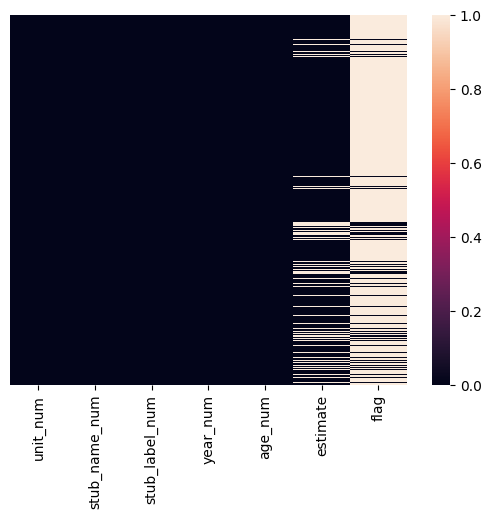

In [53]:
# checking for the null values in the whole dataset through heatmap
sns.heatmap(data.isnull(), yticklabels=False)
plt.show()

- Around 14% null values in estimate & 85% null values are present in the flag column

#### Handling Missing Values

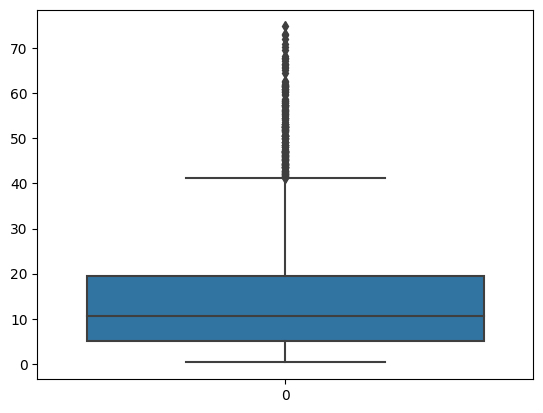

In [57]:
# checking for the outliers in estimate feature
sns.boxplot(data.estimate)
plt.show()

In [82]:
# so we can't use mean to impute missing values as mean is the central tendency that is more influenced by outliers
# std
print('Std is {}'.format(data.estimate.std()))

# mean
print('Mean is {}'.format(data.estimate.mean()))

# median
print('Median is {}'.format(data.estimate.median()))

# mode
print('Mode is {}'.format(data.estimate.mode()))

Std is 11.531805309076454
Mean is 13.709810357403356
Median is 10.5
Mode is 0    4.3
Name: estimate, dtype: float64


In [83]:
# using interpolation method to handle missing values
data.estimate = data.estimate.interpolate(method='linear')

# std
print('Std is {}'.format(data.estimate.std()))

# mean
print('Mean is {}'.format(data.estimate.mean()))

# median
print('Median is {}'.format(data.estimate.median()))

# mode
print('Mode is {}'.format(data.estimate.mode()))

Std is 11.265850889566256
Mean is 13.48303599374022
Median is 10.3
Mode is 0    4.3
Name: estimate, dtype: float64


- We can see that after applying the interpolation method to handle missing values, mean, median, mode and std all are similar which means that we can use this for model building

In [86]:
#flag has too many missing values so it's good to drop it instead of handling or filling it & we can't duplicate the data 
data.drop('flag', axis=1, inplace=True)

,unit_num,stub_name_num,stub_label_num,year_num,age_num,estimate
0,1,0,0.0,1,0.0,13.2
1,1,0,0.0,2,0.0,12.5
2,1,0,0.0,3,0.0,13.1
3,1,0,0.0,4,0.0,12.2
4,1,0,0.0,5,0.0,12.3


<!-- Moving towards checking for outliers -->

In [87]:
data.head()

,unit_num,stub_name_num,stub_label_num,year_num,age_num,estimate
0,1,0,0.0,1,0.0,13.2
1,1,0,0.0,2,0.0,12.5
2,1,0,0.0,3,0.0,13.1
3,1,0,0.0,4,0.0,12.2
4,1,0,0.0,5,0.0,12.3


#### Moving towards handling outliers

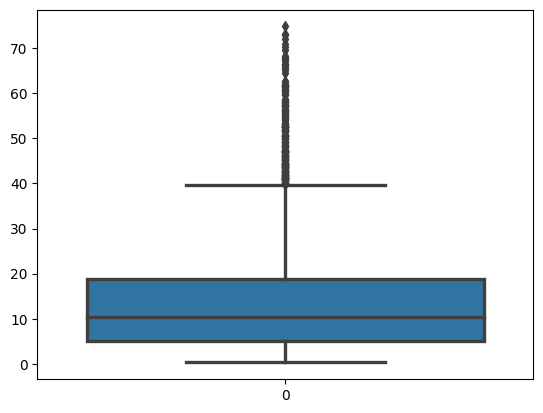

In [90]:
sns.boxplot(data['estimate'], linewidth=2.4)
plt.show()

In [103]:
data.describe(percentiles=[0.01,0.05,0.90,0.95,0.96,0.97,0.98,0.99])

,unit_num,stub_name_num,stub_label_num,year_num,age_num,estimate
count,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000
mean,1.872926,4.621909,4.686775,22.692019,2.712207,13.483036
std,0.333081,2.031777,1.829624,12.286033,1.932280,11.265851
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.300000
1%,1.000000,0.000000,0.000000,1.000000,0.000000,1.200000
5%,1.000000,1.000000,1.310000,3.000000,0.000000,2.000000
50%,2.000000,5.000000,5.125100,23.000000,3.000000,10.300000
90%,2.000000,7.000000,7.133000,39.000000,5.000000,27.400000
95%,2.000000,7.000000,7.222000,41.000000,5.200000,35.700000
96%,2.000000,7.000000,7.224000,42.000000,5.200000,38.100000


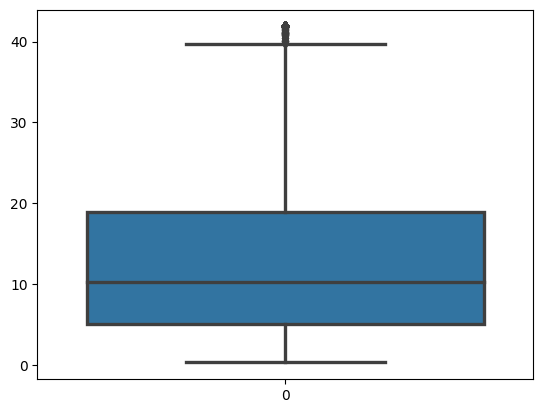

In [105]:
# Using clipping & capping method to handle outliers
# only extreme larger values are there so no need to set the lower_percentile
lower_percentile = data.estimate.min()
upper_percentile = np.percentile(data.estimate, 97)
sns.boxplot(np.clip(data.estimate.values,a_min=lower_percentile ,a_max=upper_percentile), linewidth=2.4)
plt.show()

In [109]:
data.estimate = np.clip(data.estimate.values,a_min=lower_percentile ,a_max=upper_percentile)

### Splitting the dataset

In [121]:
data.head()

,unit_num,stub_name_num,stub_label_num,year_num,age_num,estimate
0,1,0,0.0,1,0.0,13.2
1,1,0,0.0,2,0.0,12.5
2,1,0,0.0,3,0.0,13.1
3,1,0,0.0,4,0.0,12.2
4,1,0,0.0,5,0.0,12.3


In [217]:
X = data.drop('unit_num',axis=1)
y = data['unit_num']

In [218]:
y = y.map(lambda x:1 if x == 2 else 0)
y.value_counts()

unit_num
1    5578
0     812
Name: count, dtype: int64

- 1 is for crude deaths
- wheras 0 is for age-adjusted deaths

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
# stratify is for ensuring the same sample proportion inorder to reduce class imbalance

In [220]:
X_train.head()

,stub_name_num,stub_label_num,year_num,age_num,estimate
5786,7,7.135,39,5.0,14.5
1738,3,3.131,3,3.1,19.8
726,6,6.230,14,0.0,2.3
849,0,0.000,38,0.0,13.4
5612,7,7.125,33,5.0,9.8


In [221]:
y_train.head()

5786    1
1738    1
726     0
849     1
5612    1
Name: unit_num, dtype: int64

#### Skewness

In [222]:
X_train.skew()

stub_name_num    -0.080026
stub_label_num   -0.435131
year_num         -0.098776
age_num          -0.181590
estimate          1.102478
dtype: float64

In [223]:
# Using shapiro testing to get the exact results
stats, pvalue = shapiro(data.estimate)
print(pvalue)    

0.0


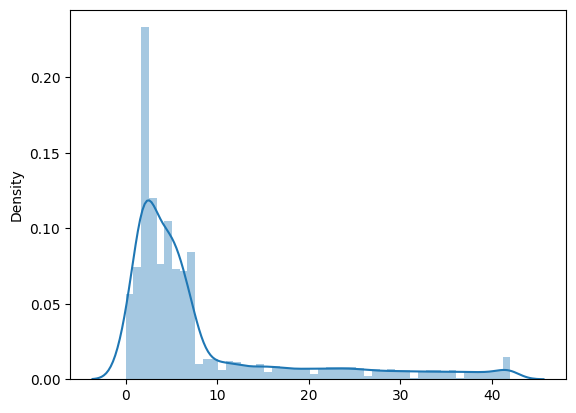

In [224]:
sns.distplot(data)
plt.show()

In [225]:
# creating object for StandardScaler
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train_new, columns=X_train.columns)

### Model Building Using LogisticRegression()

In [226]:
# creating an object for GLM(Generalized linear model)
lr = LogisticRegression(penalty='elasticnet',C=1,l1_ratio=0.7,solver='saga')
lr.fit(X_train, y_train)

LogisticRegression(C=1, l1_ratio=0.7, penalty='elasticnet', solver='saga')

#### Checking VIF

In [227]:
# VIF dataframe 
vif = pd.DataFrame() 
vif["feature"] = X_train.columns 
  
# calculating VIF for each feature 
vif["VIF"] = [variance_inflation_factor(X_train.values, i) 
                          for i in range(X_train.shape[1])] 
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
0,stub_name_num,12.57
1,stub_label_num,12.43
4,estimate,1.11
3,age_num,1.09
2,year_num,1.08


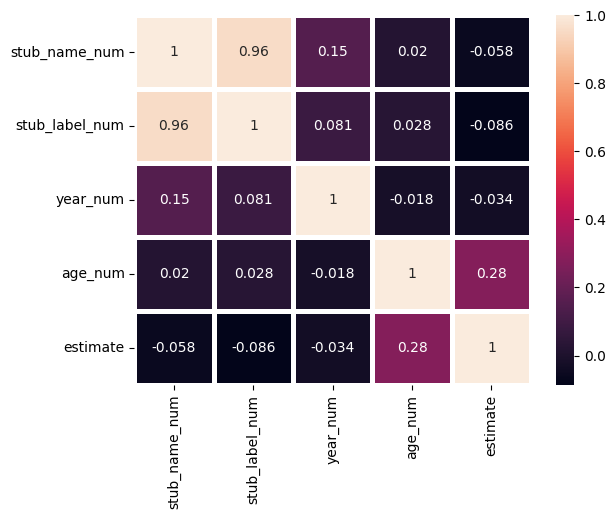

In [247]:
# drawing heatmap
sns.heatmap(X_train.corr(), annot=True,linewidth=2.4)
plt.show()

In [228]:
y_train_pred = lr.predict(X_train)
y_train_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

- As we have only 5 columns so it's good to retain all these without dropping them.

### Evaluation Metrics

In [229]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[ 407,  161],
       [ 357, 3548]], dtype=int64)

In [230]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [231]:
sensitivity = TP/(TP+FN)
sensitivity

0.9085787451984635

In [232]:
specificity = TN/(TN+FP)
specificity

0.7165492957746479

In [233]:
accuracy_score = (TP+TN)/(TP+TN+FN+FP)
accuracy_score

0.8841940532081377

In [234]:
prevalance = (TP+FN)/(TP+FP+FN+TN)
prevalance

0.873015873015873

In [235]:
Prob_of_true_negative = (TN+FP)/(TN+TP+FN+FP)
Prob_of_true_negative

0.12698412698412698

In [236]:
true_accuracy = sensitivity * prevalance + specificity * Prob_of_true_negative
true_accuracy

0.8841940532081377

### Predictions on Testing set

In [237]:
X_test_new = sc.transform(X_test)
X_test = pd.DataFrame(X_test_new, columns=X_test.columns)
X_test.head()

,stub_name_num,stub_label_num,year_num,age_num,estimate
0,0.187761,0.243531,0.432306,1.219421,-0.362299
1,1.164337,1.389583,-0.374446,0.131242,-1.047909
2,0.187761,0.296759,-1.019847,0.131242,-0.959759
3,0.676049,0.838822,0.190280,-1.423299,-1.116470
4,-0.788815,-0.841192,-1.584574,0.131242,0.754265


In [238]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [239]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[ 151,   93],
       [ 201, 1472]], dtype=int64)

In [240]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [241]:
sensitivity = TP/(TP+FN)
sensitivity

0.8798565451285116

In [242]:
specificity = TN/(TN+FP)
specificity

0.6188524590163934

In [243]:
accuracy_score = (TP+TN)/(TP+TN+FN+FP)
accuracy_score

0.8466353677621283

In [244]:
prevalance = (TP+FN)/(TP+FP+FN+TN)
prevalance

0.872717788210746

In [245]:
Prob_of_true_negative = (TN+FP)/(TN+TP+FN+FP)
Prob_of_true_negative

0.12728221178925403

In [246]:
true_accuracy = sensitivity * prevalance + specificity * Prob_of_true_negative
true_accuracy

0.8466353677621282

- Again the overall accuracy of the model on the test set and training set are similar i.e training accuracy is :88% while testing accuracy is : 84% using LogisticRegression()

### Model Building Using DecisionTreeClassifier()

In [271]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini', 'entropy','log_loss'],
             'splitter':['best', 'random'],
             'max_depth':[1,2,3,4,5]}

grid = GridSearchCV(tree, parameters,cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

- These all are the important cretieries that we need to choose to find the optimal results

In [276]:
y_train_pred = grid.predict(X_train)
y_train_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [277]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[ 111,  133],
       [ 116, 1557]], dtype=int64)

In [278]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [279]:
sensitivity = TP/(TP+FN)
sensitivity

0.9306634787806336

In [280]:
specificity = TN/(TN+FP)
specificity

0.45491803278688525

In [281]:
accuracy_score = (TP+TN)/(TP+TN+FN+FP)
accuracy_score

0.8701095461658842

In [282]:
prevalance = (TP+FN)/(TP+FP+FN+TN)
prevalance

0.872717788210746

In [283]:
Prob_of_true_negative = (TN+FP)/(TN+TP+FN+FP)
Prob_of_true_negative

0.12728221178925403

In [284]:
true_accuracy = sensitivity * prevalance + specificity * Prob_of_true_negative
true_accuracy

0.8701095461658842

### Predictions on test set

In [273]:
y_test_pred = grid.predict(X_test)
y_test_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [285]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[ 111,  133],
       [ 116, 1557]], dtype=int64)

In [286]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [287]:
sensitivity = TP/(TP+FN)
sensitivity

0.9306634787806336

In [288]:
specificity = TN/(TN+FP)
specificity

0.45491803278688525

In [289]:
accuracy_score = (TP+TN)/(TP+TN+FN+FP)
accuracy_score

0.8701095461658842

In [291]:
prevalance = (TP+FN)/(TP+FP+FN+TN)
prevalance

0.872717788210746

In [292]:
Prob_of_true_negative = (TN+FP)/(TN+TP+FN+FP)
Prob_of_true_negative

0.12728221178925403

In [293]:
true_accuracy = sensitivity * prevalance + specificity * Prob_of_true_negative
true_accuracy

0.8701095461658842

- Again the overall accuracy of the model on the test set and training set are similar i.e training accuracy is :87% while testing accuracy is : 87% using DecisionTreeClassifier()